Exercide Module 3 ini dikerjakan oleh Muhammad Irfan Arisani dengan kode DS04078. Exercise ini telah dicoba pada Jupyter Notebook dengan tool Anaconda. Notebook ini Saya sertakan untuk melihat kompatibiltas pada perangkat lokal, dengan catatan telah menginstall paket-paket tertentu.

#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

##**Importing Dataset**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [2]:
data = pd.read_csv('penguins_size.csv') 
study_data = pd.read_csv('penguins_lter.csv') 

Memanggil tabel data

In [3]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [4]:
data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


***
**Insight**
***
Berapa rata - rata body mass penguin? Rata-rata body mass penguin adalah 4201.75


##**Handling Missing Values**

Cek jumlah missing value!

In [5]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Mengisi missing value pada sex dengan modus!

In [6]:
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut! 

In [7]:
data.drop(data[data['sex']=='.'].index, inplace=True)

Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [8]:
data.dropna(inplace=True)

Cek kembali apakah masih ada missing value!

In [9]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

***
**Insight**
***
Apakah masih terdapat missing value? Tidak, missing vales sudah diatasi.

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

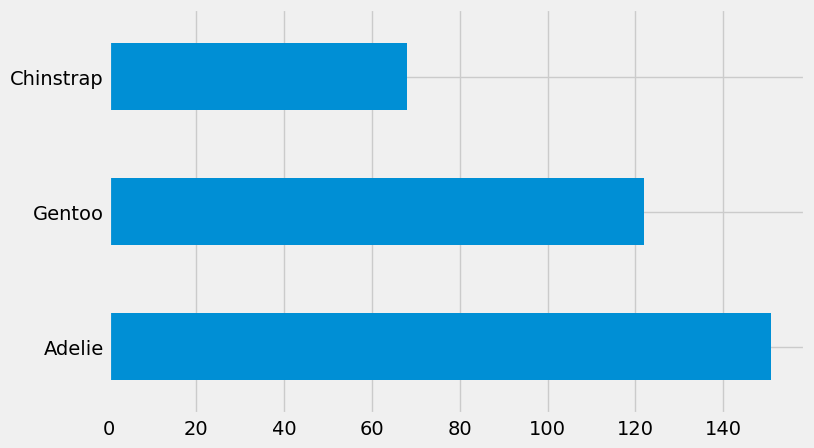

In [10]:
data['species'].value_counts().plot(kind='barh')
plt.show()

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak? Species Adelie.

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

culmen_length vs flipper_length


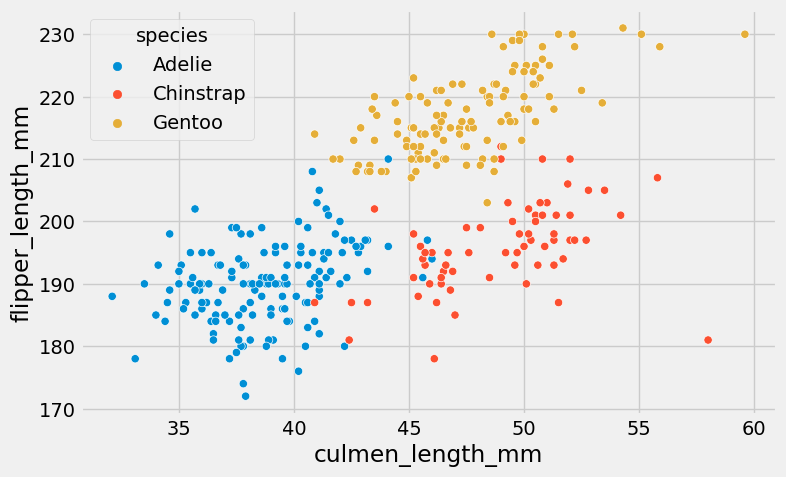

In [11]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=data, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length? Yakni berkorelasi positif sedang.

Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

flipper_length vs body_mass


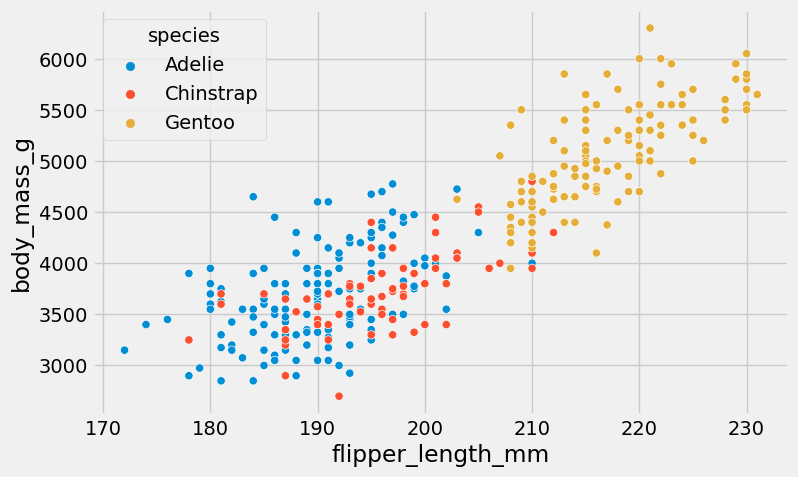

In [12]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass? Yakni berkorelasi positif kuat.

Tampilkan pairplot dari semua variabel!

Pairplot


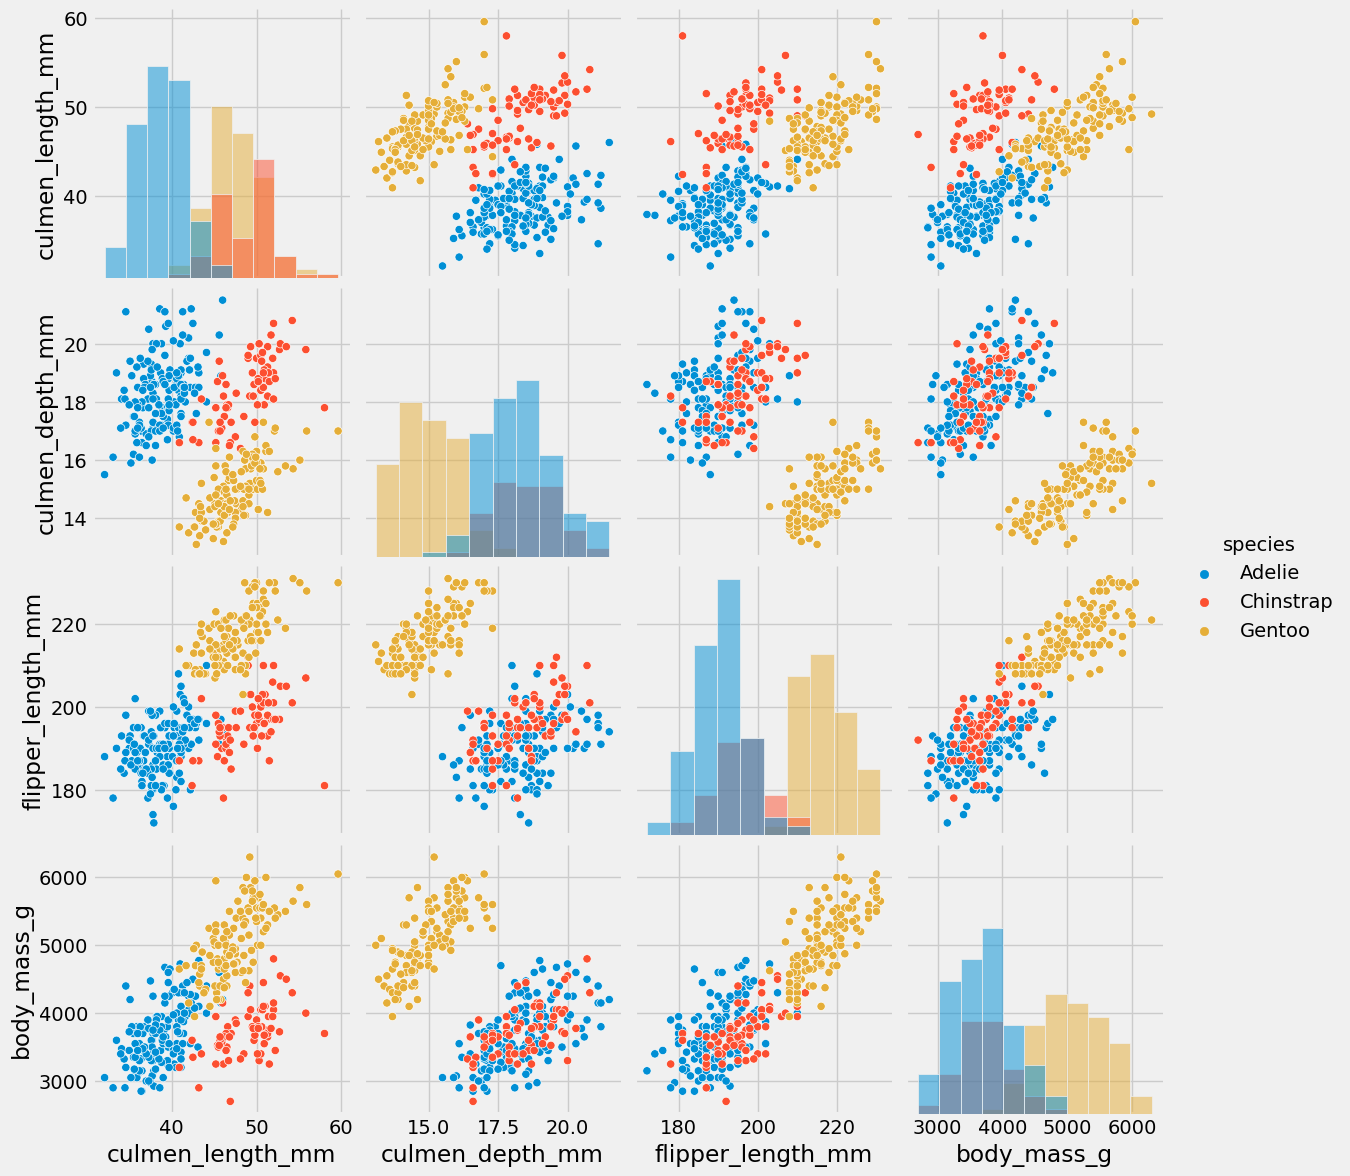

In [13]:
print('Pairplot')
sns.pairplot(data=data[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas?

Dari pairplot di atas dapat dipetik wawasan-wawasan seperti:

1. Semua fitur pada dataset menunjukkan hubungan korelasi yang positif untuk semua spesies.
2. Pada spesies Adelie dan Chinstrap, ternyata memiliki kesamaan ciri-ciri pada korelasi panjang culmen (paruh) dan panjang flipper (sirip).
3. Serupa dengan insight nomor 1, kedua spesies juga memiliki kesamaan ciri-ciri pada panjang culmen (paruh) dan massa tubuh.
4. Spesies Adelie memiliki massa tubuh lebih besar dari pada dua spesies lainnya.
5. Hubungan korelasi flipper dengan massa tubuh menunjukkan korelasi positif yang kuat.
6. Hubungan korelasi culmen dengan flipper menunjukkan korelasi positif yang sedang.

#**Module 3: Machine Learning**

##**Data Encoding**

Lakukan data encoding pada kolom 'species' dan 'island'!

In [14]:
#input your code here
# langkah-langkah:
# 1. cek data-data unik yang ada di 'species' dan 'island'
# 2. simpan dalam bentuk variabel
# 3. lakukan 'mapping encoding'

# penyelesaian:
# 1. lihat: https://pandas.pydata.org/docs/reference/api/pandas.unique.html
# 2. lihat: https://www.w3schools.com/python/python_tuples.asp
# 2. lihat: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
spec = tuple(data.species.unique())
isla = tuple(data.island.unique())
mod_df = data.copy()
print(spec, isla)

('Adelie', 'Chinstrap', 'Gentoo') ('Torgersen', 'Biscoe', 'Dream')


In [15]:
# 3. lihat: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/
for i in range(len(spec)):
  mod_df.loc[mod_df['species'] == spec[i], 'species'] = i+1

In [16]:
# 3. lihat: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/
for i in range(len(isla)):
  mod_df.loc[mod_df['island'] == isla[i], 'island'] = i+1

Data encoding untuk kolom 'sex', kodekan male sebagai 0 dan female sebagai 1!

In [17]:
#input your code here
# langkah-langkah:
# 1. cek data-data unik yang ada di 'sex'
# 2. simpan dalam bentuk variabel
# 3. lakukan 'mapping encoding'

# penyelesaian:
# 1. lihat: https://pandas.pydata.org/docs/reference/api/pandas.unique.html
# 2. lihat: https://www.w3schools.com/python/python_tuples.asp
sexx = tuple(data.sex.unique())
print(sexx)

('MALE', 'FEMALE')


In [18]:
# 3. lihat: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/
for i in range(len(sexx)):
  mod_df.loc[mod_df['sex'] == sexx[i], 'sex'] = i

***
**Insight**
***
Bagaimana dataset setelah dilakukan encoding? Berikut adalah hasil akhir setelah dilakukan mapping encoding.

In [19]:
mod_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.1,18.7,181.0,3750.0,0
1,1,1,39.5,17.4,186.0,3800.0,1
2,1,1,40.3,18.0,195.0,3250.0,1
4,1,1,36.7,19.3,193.0,3450.0,1
5,1,1,39.3,20.6,190.0,3650.0,0


##**Memisahkan Variabel Dependen dan Independen**

Variabel dependen yang digunakan adalah data pada kolom 'sex', kolom lainnya merupakan variabel independen

Pisahkan variabel independen sebagai X dan independen sebagai y!

In [20]:
#input your code here
# langkah-langkah:
# 1. lakukan indexing pada data.
# 1.1. variabel 'x' isi dengan semua baris dan kolom selain 'species'
# 1.2. variabel 'y' isi dengan semua baris dan hanya kolom 'species'
# 2. pastikan tipe datanya berupa numerik

# penyelesaian:
# 1. lihat: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
x = mod_df.iloc[:, 1:-1]
y = mod_df.iloc[:, 0]

# 2. lihat: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
x = x.astype('float64')
y = y.astype('int64')

##**Scaling the Data**

Lakukan scaling pada x!

In [21]:
from sklearn import preprocessing

In [22]:
#input your code here
# langkah-langkah:
# 1. lakukan fungsi standarisasi

# penyelesaian:
# 1. lihat: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

##**Splitting Dataset**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20!

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#input your code here
# langkah-langkah:
# 1. lakukan splitting data train dan data test

# penyelesaian:
# 1. lihat: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

##**Model Fitting**

Build model klasifikasi machine learning menggunakan model Decision Tree!

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
#input your code here
# langkah-langkah:
# 1. latih data dengan decision tree.
# 2. lihat akurasinya.

# penyelesaian:
# 1. lihat: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [28]:
# 2. lihat: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
y_pred = model.predict(x_test)

acc = accuracy_score(y_pred, y_test)
print('Akurasi model Decision tree sebesar:', round(acc, 2))

Akurasi model Decision tree sebesar: 0.99
